# COVID-19 

## Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Functions

In [2]:
def create_by_country_dataframe(df):
    by_country = df.T
    by_country.columns = by_country.loc["Country/Region"]
    by_country = by_country[4:]
    by_country = by_country.groupby(axis=1, by=by_country.columns).sum()
    by_country.index = pd.to_datetime(by_country.index)
    return by_country

def is_it_spreading(df):
    return df.apply(np.gradient, axis=0)

## Data Loading

In [3]:
data = "../data/raw/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/"

In [4]:
confirmed = f"{data}time_series_19-covid-Confirmed.csv"
deaths = f"{data}time_series_19-covid-Deaths.csv"
recovered = f"{data}time_series_19-covid-Recovered.csv"

In [5]:
df_confirmed = pd.read_csv(confirmed)
df_deaths = pd.read_csv(deaths)
df_recovered = pd.read_csv(recovered)

In [6]:
df = {
    "confirmed": df_confirmed,
    "deaths": df_deaths,
    "recovered": df_recovered
}

In [7]:
df.get("confirmed").head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,410,411,413,414,414,418,418,422,426,428
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,102,119,120,124


## Compute a index by country

In [8]:
by_country = {
    "confirmed" : create_by_country_dataframe(df.get("confirmed")),
    "deaths" : create_by_country_dataframe(df.get("deaths")),
    "recovered" : create_by_country_dataframe(df.get("recovered"))
}

Compute the existing cases and add them to the Dictionnary

In [9]:
# Active cases = total confirmed - total recovered - total deaths
by_country["existing"] = by_country["confirmed"] - by_country["recovered"] - by_country["deaths"]

## Define some regions of interest

In [10]:
CH = ["Switzerland"]
CH_neighbors = ["Italy", "France", "Liechtenstein", "Austria", "Germany", "Switzerland"]
CH_neighbors_no_italy = ["France", "Liechtenstein", "Austria", "Germany", "Switzerland"]

In [11]:
# Bulgaria, Cyprus and Romania are not in the list
# Switzerland has been added
EU = ["Switzerland","Austria","Belgium","Croatia","Czech Republic","Denmark","Estonia","Finland","France","Germany","Greece","Hungary","Ireland","Italy","Latvia","Lithuania","Luxembourg","Malta","Netherlands","Poland","Portugal","Romania","Slovakia","Slovenia","Spain","Sweden"]
EU_no_italy = ["Switzerland","Austria","Belgium","Croatia","Czech Republic","Denmark","Estonia","Finland","France","Germany","Greece","Hungary","Ireland","Latvia","Lithuania","Luxembourg","Malta","Netherlands","Poland","Portugal","Romania","Slovakia","Slovenia","Spain","Sweden"]

## How many cases are present?

### In Europe

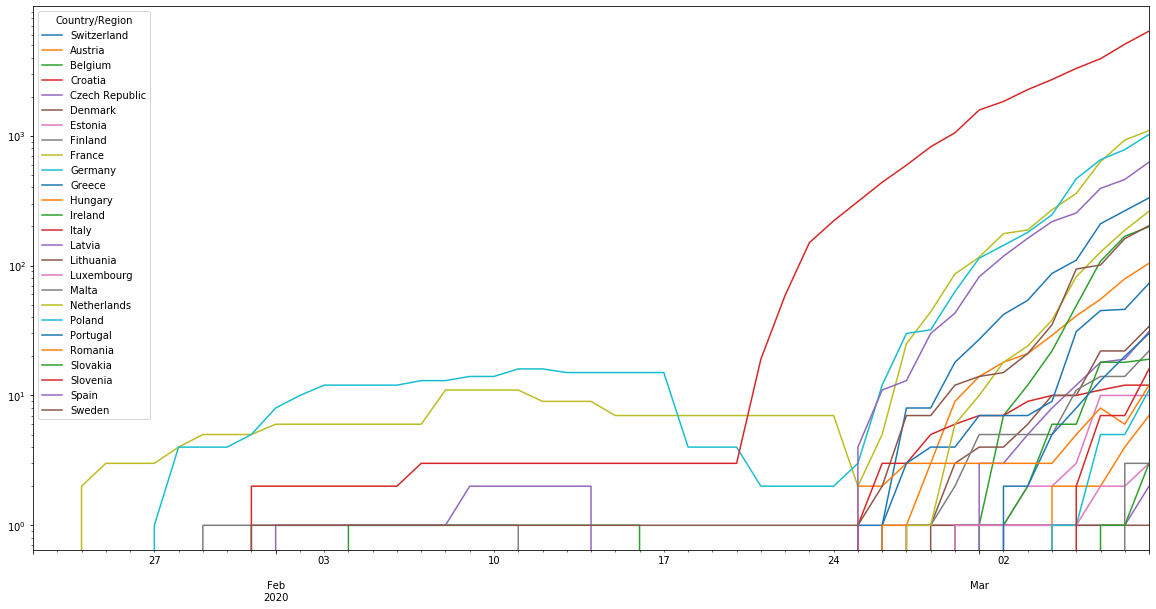

In [12]:
by_country.get("existing")[EU].plot(figsize=(20,10), logy=True);

### In the surrounding countries of Switzerland

In [13]:
by_country["existing"][CH_neighbors].tail()

Country/Region,Italy,France,Liechtenstein,Austria,Germany,Switzerland
2020-03-04,2706.0,269.0,1.0,29.0,246.0,87.0
2020-03-05,3296.0,359.0,1.0,41.0,466.0,110.0
2020-03-06,3916.0,632.0,1.0,55.0,653.0,210.0
2020-03-07,5061.0,926.0,1.0,79.0,781.0,264.0
2020-03-08,6387.0,1095.0,1.0,104.0,1022.0,332.0


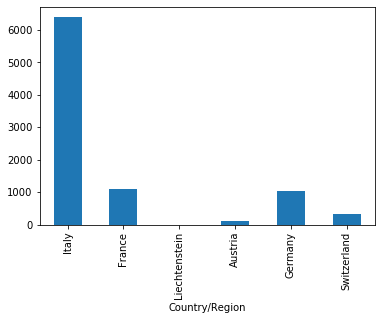

In [14]:
by_country["existing"][CH_neighbors].iloc[-1].plot.bar();

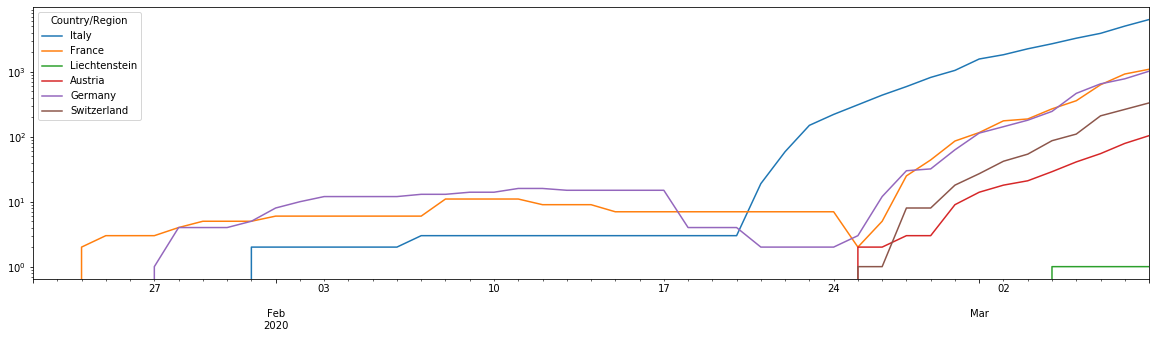

In [15]:
by_country.get("existing")[CH_neighbors].plot(figsize=(20,5), logy=True);

### In Switzerland only

In [16]:
from_date = "17-02-2020"

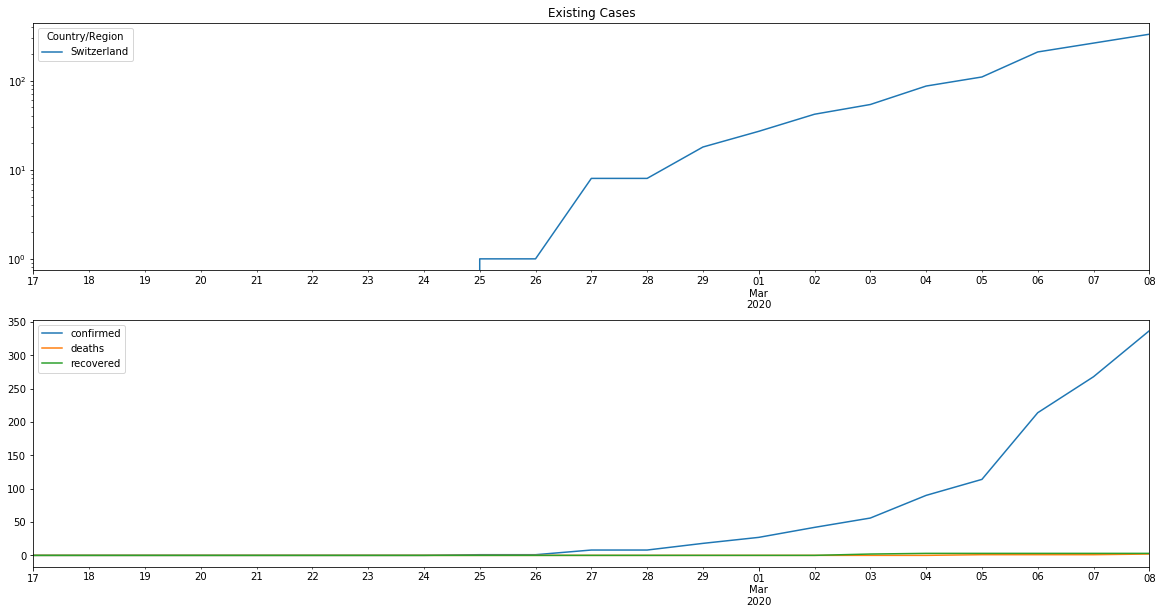

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_title("Existing Cases")
by_country["existing"][CH][from_date:].plot(logy=True, ax=ax1);
by_country["confirmed"][CH][from_date:].plot(figsize=(20,10), ax=ax2);
by_country["deaths"][CH][from_date:].plot(figsize=(20,10), ax=ax2);
by_country["recovered"][CH][from_date:].plot(figsize=(20,10), ax=ax2);
ax2.legend(by_country.keys());

## How fast does COVID-19 spread?

In [18]:
spread = is_it_spreading(by_country["existing"])

### In Europe

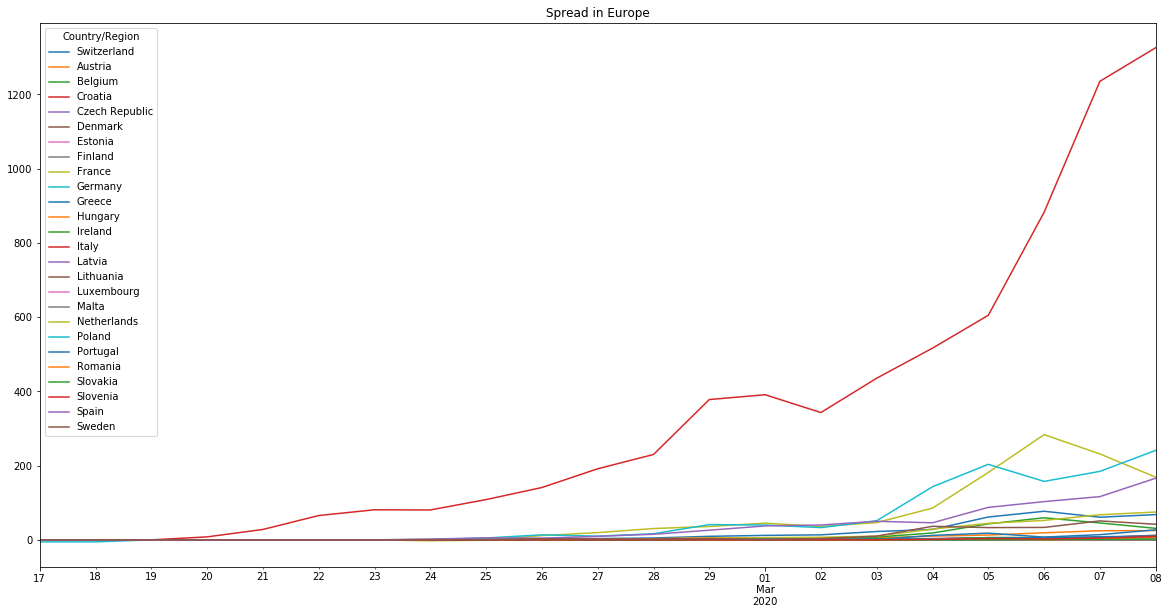

In [19]:
spread[EU][from_date:].plot(figsize=(20,10), title="Spread in Europe");

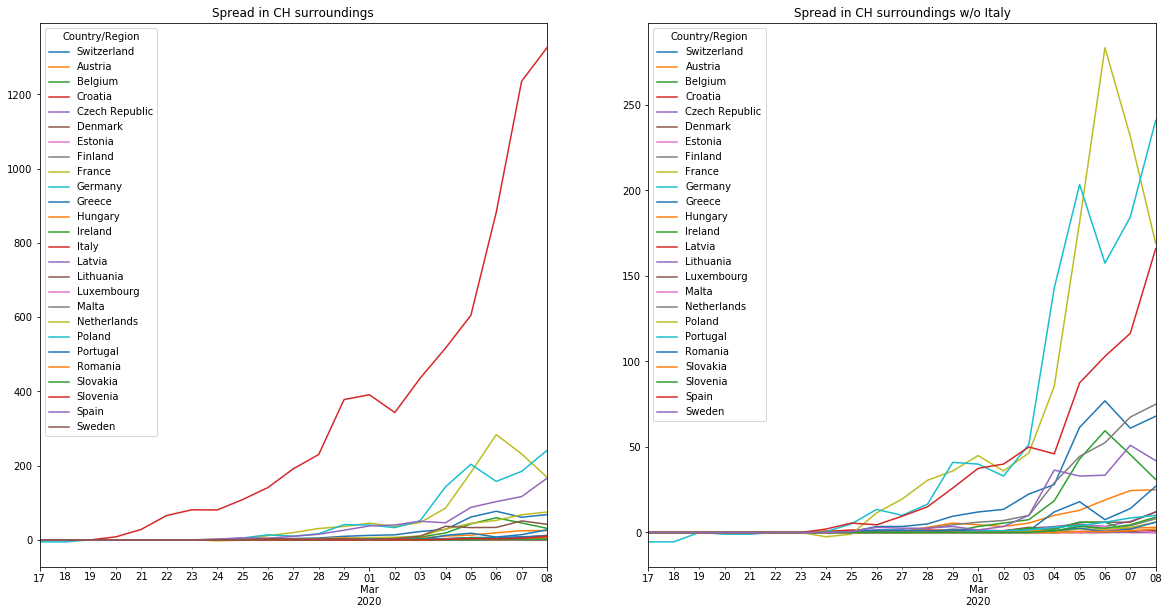

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.set_title("Spread in CH surroundings")
spread[EU][from_date:].plot(figsize=(20,10),ax=ax1);
ax2.set_title("Spread in CH surroundings w/o Italy")
spread[EU_no_italy][from_date:].plot(figsize=(20,10),ax=ax2);


### In the surrounding countries of Switzerland

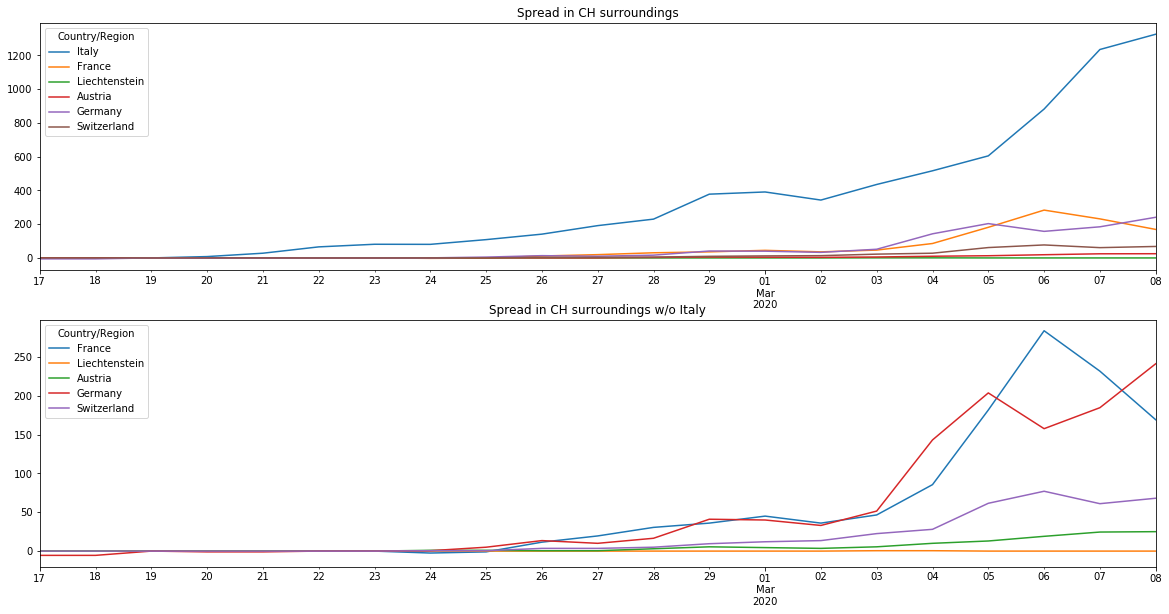

In [21]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.set_title("Spread in CH surroundings")
spread[CH_neighbors][from_date:].plot(figsize=(20,10),ax=ax1);
ax2.set_title("Spread in CH surroundings w/o Italy")
spread[CH_neighbors_no_italy][from_date:].plot(figsize=(20,10),ax=ax2);